In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 0.43500516,  0.74359809,  1.24270029, -0.33601898, -0.43125548,
        -1.2992061 , -1.40241685, -1.35987774, -0.01363474,  2.42003751],
       [ 0.0664565 , -0.71910349,  0.15147085, -0.61226458, -0.43487513,
         0.37203833,  0.33954256, -0.32609408,  1.22388131, -2.04874067]])

In [4]:
test_Features[:2]

array([[ 3.73418026,  6.43310663,  3.16002236, -1.75116228, -1.66284171,
        -4.13788195, -2.59528859,  5.36211918,  1.33394939,  1.54600894],
       [-0.51644527, -0.30809427,  0.36011003, -0.22770882, -0.40048845,
        -0.06332888, -0.59929564, -0.12296727, -0.89605277, -0.25347346]])

In [5]:
train_Label[:4]

array([0, 0, 0, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 1, 1, 0])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*5,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=30*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               1650      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_3 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_4 (Dense)              (None, 60)                5460      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 37,981
Trainable params: 37,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 5s - loss: 0.6784 - acc: 0.6468 - val_loss: 0.5930 - val_acc: 0.6452
Epoch 2/30
 - 1s - loss: 0.4794 - acc: 0.7700 - val_loss: 0.4061 - val_acc: 0.8193
Epoch 3/30
 - 1s - loss: 0.3956 - acc: 0.8269 - val_loss: 0.3862 - val_acc: 0.8371
Epoch 4/30
 - 1s - loss: 0.3691 - acc: 0.8436 - val_loss: 0.3758 - val_acc: 0.8456
Epoch 5/30
 - 1s - loss: 0.3539 - acc: 0.8542 - val_loss: 0.3665 - val_acc: 0.8515
Epoch 6/30
 - 1s - loss: 0.3425 - acc: 0.8607 - val_loss: 0.3573 - val_acc: 0.8640
Epoch 7/30
 - 1s - loss: 0.3350 - acc: 0.8640 - val_loss: 0.3496 - val_acc: 0.8594
Epoch 8/30
 - 1s - loss: 0.3292 - acc: 0.8642 - val_loss: 0.3535 - val_acc: 0.8594
Epoch 9/30
 - 1s - loss: 0.3278 - acc: 0.8637 - val_loss: 0.3461 - val_acc: 0.8653
Epoch 10/30
 - 1s - loss: 0.3210 - acc: 0.8675 - val_loss: 0.3459 - val_acc: 0.8647
Epoch 11/30
 - 1s - loss: 0.3164 - acc: 0.8679 - val_loss: 0.3413 - val_acc: 0.8614
Epoch 12/30
 - 1s - loss: 0.3188 - a

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

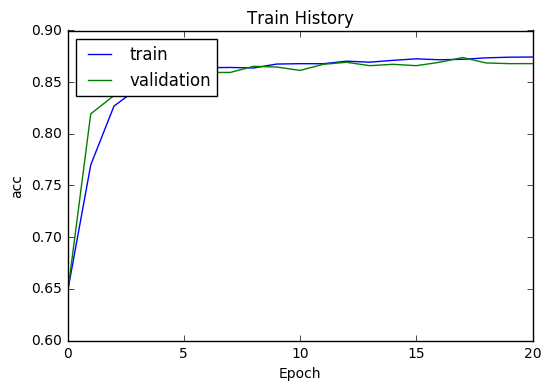

In [20]:
show_train_history(train_history,'acc','val_acc')

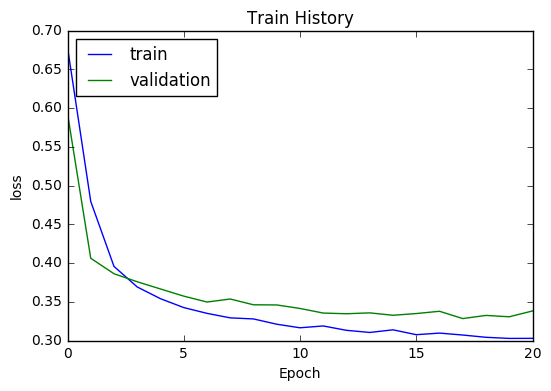

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 61us/step


In [23]:
scores[1]

0.8696109359196684